In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
from scipy.special import gamma

def q_tukey(k, v, alpha):

    qarray = []
    for k in range(2,k+1):
        print ("q_tukey: calculating k = ",k)

        dq = 0.004
        qd = np.array(np.arange(0.000,6.000,dq))

        f = []
        fs = []
        found = False

        for i in range(len(qd)):
            q = qd[i]
            prefactor = np.sqrt(2.0*np.pi)*k*(k-1)*v**(v/2.0)/(gamma(v/2.0)*2**(v/2.0-1))
            npts = 30

            xh = 5.0
            xl = 0.0
            dx = (xh-xl)/npts

            x = np.arange(xl,xh,dx)
            x = x.reshape(1,-1)
    
            ul = -5.0
            uh = 5.0
            du = (uh-ul)/npts
            
            u = np.arange(ul,uh,du)
            u = u.reshape(-1,1)
            
            phi_u = stats.norm.pdf(u)
            phi_ux = stats.norm.pdf(u-q*x)
            Phi_u = stats.norm.cdf(u)
            Phi_ux = stats.norm.cdf(u-q*x)
            phi_x = stats.norm.pdf(np.sqrt(v)*x)
            
            integrand = x**v*phi_x*phi_u*phi_ux*(Phi_u-Phi_ux)**(k-2)*du*dx
            
            #print ("U integral matrix")
            #print(u,phi_u,phi_ux,Phi_u,Phi_ux,phi_x,x**v,integrand)
        
            sumux = integrand.sum()
            
            #print ("U sum")
            #print(sumux)
            
            #print ("X sum * prefactor")
            #print (sumux*prefactor)

            f.append(sumux*prefactor)
            
            if (i>0):
                fs.append(f[i]*dq+fs[i-1])
            else:
                fs.append(f[i]*dq)

            if (fs[i]>(1-alpha) and not(found)):
                q_critical = qd[i-1] + ((1-alpha)-fs[i-1])*(qd[i]-qd[i-1])/(fs[i]-fs[i-1])
                print ("q_critical = ",q_critical)
                found = True
        
            #print(q,f[i],fs[i])
            
        qarray.append(q_critical)
    
        f = np.array(f)
        fs = np.array(fs)
        plt.plot(qd,fs)

    qarray=np.array(qarray)
    return qarray

q_tukey: calculating k =  2
q_critical =  2.8799991632834776
q_tukey: calculating k =  3
q_critical =  3.4974114372509093
q_tukey: calculating k =  4
q_critical =  3.8594060354144495
q_tukey: calculating k =  5
q_critical =  4.118481364813626
[2.87999916 3.49741144 3.85940604 4.11848136]


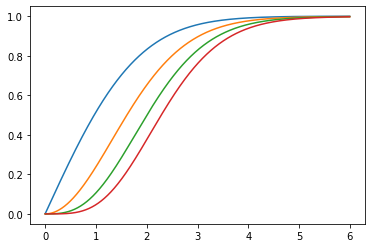

In [51]:
alpha = 0.05
k = 5
v = 28

qarray = q_tukey(k, v, alpha)

print (qarray)